In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,StackingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [385]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training7.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,0,0,0,1,0,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,0,0,0,1,0,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,0,0,0,0,0,1,0,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,0,1,0,0,0,0,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,0,0,0,0,0,1,0,0,250000


In [386]:
corr=df.corr()

In [387]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,-0.011378,...,-0.242598,NaN,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060,NaN,1.000000
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,-0.225013,NaN,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,NaN,0.790982
GrLivArea,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,-0.009640,...,-0.121102,NaN,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239,NaN,0.708624
GarageCars,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,-0.038264,...,-0.197458,NaN,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164,NaN,0.640409
GarageArea,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,-0.018227,...,-0.218665,NaN,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714,NaN,0.623431
TotalBsmtSF,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.391452,0.291066,0.362452,0.522396,0.104810,...,-0.212851,NaN,-0.032031,-0.055895,-0.047002,0.019569,-0.160222,0.266268,NaN,0.613581
1stFlrSF,-0.251758,0.414266,0.299475,0.476224,-0.144203,0.281986,0.240379,0.342160,0.445863,0.097117,...,-0.198056,NaN,-0.030196,-0.037451,0.068107,0.021949,-0.158772,0.221037,NaN,0.605852
FullBath,0.131608,0.180424,0.126031,0.550600,-0.194149,0.468271,0.439046,0.275730,0.058543,-0.076444,...,-0.161352,NaN,-0.093473,-0.006193,0.016794,-0.003225,-0.110040,0.232767,NaN,0.560664
BsmtQual_Ex,-0.055495,0.210258,0.065639,0.470780,-0.151008,0.319394,0.286165,0.333908,0.271434,-0.042850,...,-0.286102,NaN,-0.052580,-0.015756,-0.027366,-0.035427,-0.221979,0.378613,NaN,0.553105
TotRmsAbvGrd,0.040380,0.320146,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280027,0.044316,-0.035227,...,-0.113335,NaN,-0.050332,-0.008639,0.059698,0.031347,-0.092644,0.142032,NaN,0.533723


In [388]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [389]:
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('svr', SVR(kernel='rbf'))
]
meta_model = GradientBoostingRegressor()
model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [390]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [391]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')

In [392]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120,10):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,20863.232790,32648.770290,0.861030
1,20,20336.585411,32928.642473,0.858638
2,30,19347.430608,35302.649905,0.837520
3,40,18398.302270,37276.113162,0.818846
4,50,18693.464520,38083.792784,0.810911
5,60,18362.370757,36284.312494,0.828358
6,70,18235.280936,31055.033088,0.874267
7,80,18216.384652,38012.026524,0.811623
8,90,17489.262023,36549.679893,0.825838
9,100,18091.686953,41536.030457,0.775076


In [393]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
10,110,17335.076837,37510.081516,0.816565
8,90,17489.262023,36549.679893,0.825838
9,100,18091.686953,41536.030457,0.775076
7,80,18216.384652,38012.026524,0.811623
6,70,18235.280936,31055.033088,0.874267
5,60,18362.370757,36284.312494,0.828358
3,40,18398.302270,37276.113162,0.818846
4,50,18693.464520,38083.792784,0.810911
2,30,19347.430608,35302.649905,0.837520
1,20,20336.585411,32928.642473,0.858638


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


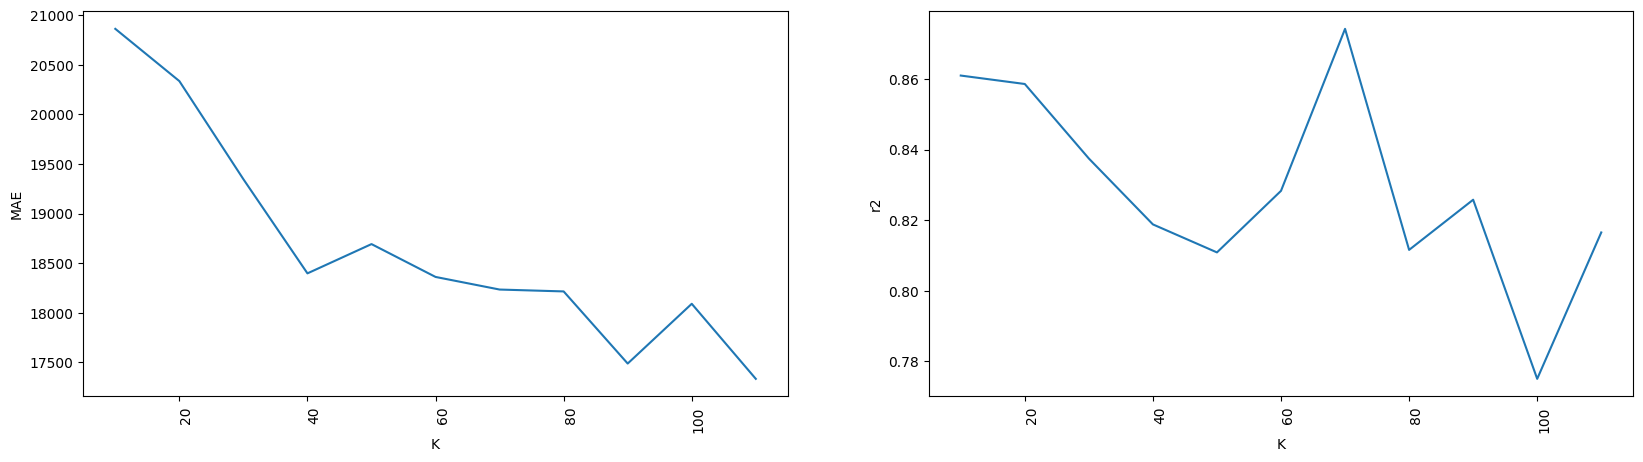

In [394]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [395]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               1.788113e+03
LotFrontage              4.847253e+02
LotArea                  9.955741e+07
OverallQual              1.911369e+00
OverallCond              1.237474e+00
                             ...     
SaleCondition_Family     1.351098e-02
SaleCondition_Normal     1.472490e-01
SaleCondition_Partial    7.828626e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [396]:
varr.loc[varr > 0.1].index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ageofhouse',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'

### 2.USING VarianceThreshold FROM SKLEARN

In [397]:
from sklearn.feature_selection import VarianceThreshold

In [398]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ageofhouse',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'

In [399]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500,10):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic_var=pd.DataFrame(statistic_tup)
statistic_var

,K,MAE,RMSE,r2
0,100,17588.440556,37104.596788,0.820509
1,110,17655.618757,37097.041962,0.820583
2,120,17588.903943,36450.705693,0.826780
3,130,17650.104124,37375.027085,0.817884
4,140,18681.465520,43090.090894,0.757930
5,150,18680.204755,43111.746160,0.757687
6,160,18659.221764,43016.284133,0.758759
7,170,18672.122339,43064.383463,0.758219
8,180,18690.057575,43172.933177,0.756998
9,190,18717.146351,43123.460386,0.757555


In [400]:
statistic_var.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
11,210,16817.077591,30495.949659,0.878753
15,250,16835.300237,30455.957637,0.879071
31,410,16935.569190,27844.735749,0.898918
32,420,16944.830678,27938.373628,0.898237
36,460,16958.990013,28182.063137,0.896454
17,270,16968.541106,32202.845542,0.864801
37,470,16974.834144,28055.199514,0.897385
34,440,16975.278406,28266.954198,0.895830
35,450,16975.946026,28196.746226,0.896346
33,430,16979.666482,28262.797183,0.895860


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


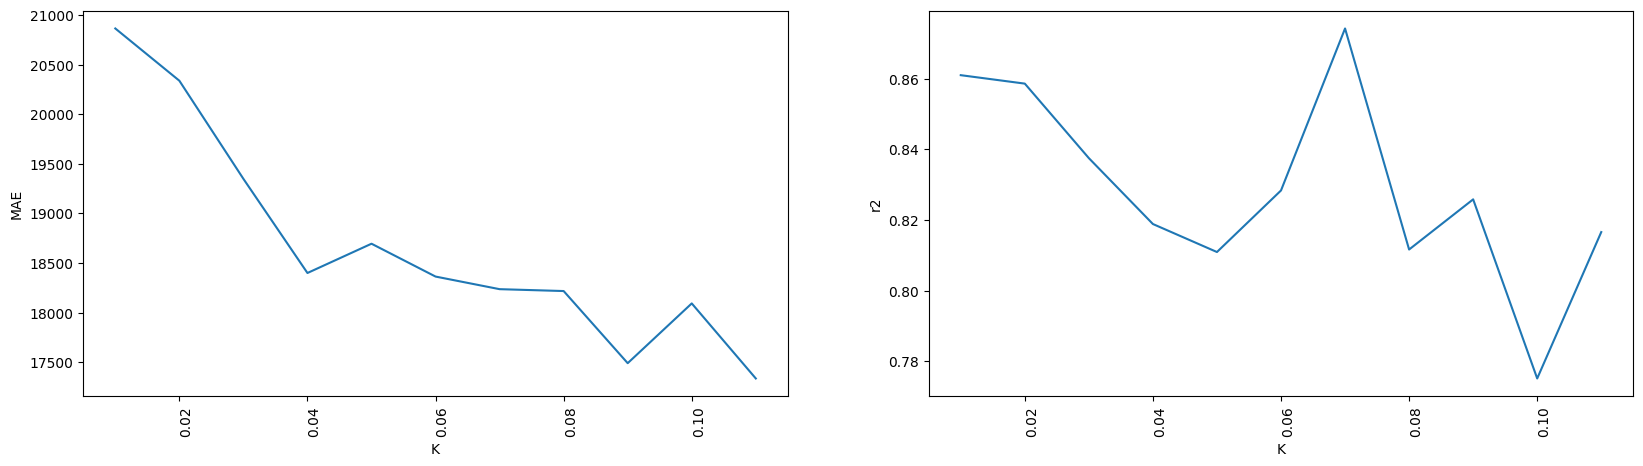

In [401]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


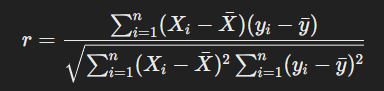

### Using numpy

In [402]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [403]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.7909816005838051


In [404]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['OverallQual', 0.7909816005838051],
 ['TotalBsmtSF', 0.6135805515591953],
 ['1stFlrSF', 0.6058521846919146],
 ['GrLivArea', 0.708624477612652],
 ['GarageCars', 0.640409197258352],
 ['GarageArea', 0.6234314389183616]]

### Using sklearn

In [405]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [406]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120,10):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,20725.433024,30432.528706,0.879257
1,15,20245.088758,31288.059848,0.872373
2,25,18418.157592,27589.377155,0.900764
3,35,18173.356427,32300.704802,0.863978
4,45,17999.787065,33458.812992,0.854049
5,55,18369.878453,33457.190339,0.854063
6,65,17735.286296,29829.713916,0.883993
7,75,18840.387468,37759.579894,0.814117
8,85,18453.243630,41040.674397,0.780409
9,95,17952.170270,38631.810791,0.805430


In [407]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
11,115,17641.701385,36594.389698,0.825412
6,65,17735.286296,29829.713916,0.883993
9,95,17952.170270,38631.810791,0.805430
10,105,17992.809194,36826.660169,0.823188
4,45,17999.787065,33458.812992,0.854049
3,35,18173.356427,32300.704802,0.863978
5,55,18369.878453,33457.190339,0.854063
2,25,18418.157592,27589.377155,0.900764
8,85,18453.243630,41040.674397,0.780409
7,75,18840.387468,37759.579894,0.814117


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


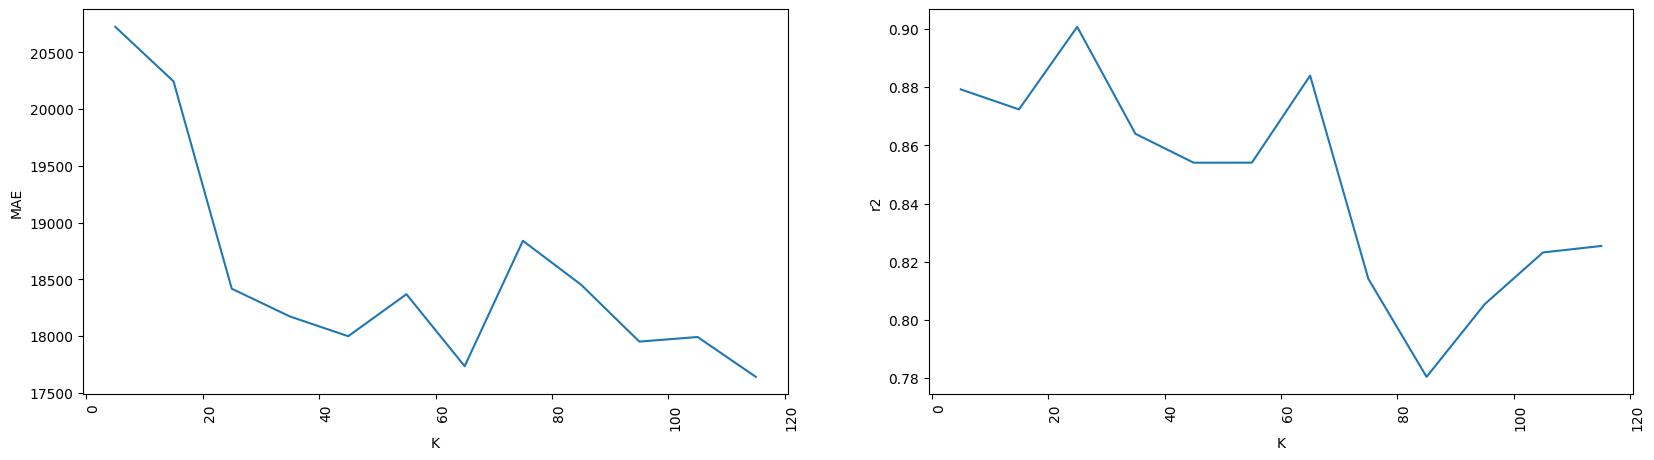

In [408]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

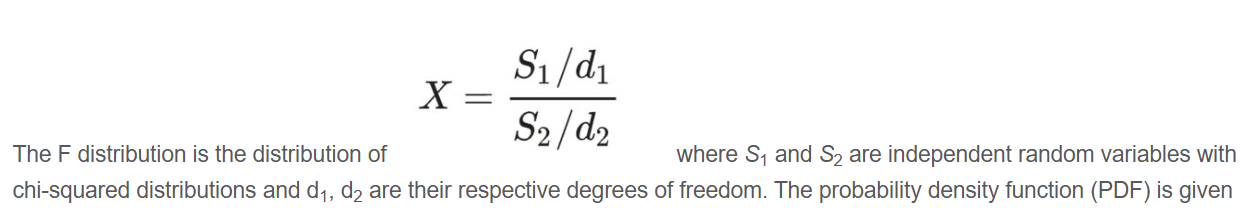

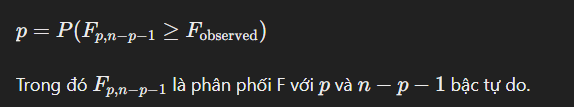

In [409]:
from sklearn.feature_selection import f_regression

In [410]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120,10):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,20886.644123,31100.390862,0.873899
1,15,19229.670770,29755.590917,0.884569
2,25,21538.571873,44609.017211,0.740563
3,35,19584.235806,38631.764742,0.805430
4,45,18501.214411,33379.246249,0.854742
5,55,19239.909667,39692.122146,0.794603
6,65,18137.742652,38580.834825,0.805943
7,75,18634.608620,37998.649010,0.811755
8,85,16858.349451,30422.767481,0.879334
9,95,17728.409761,34147.754438,0.847977


In [411]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
8,85,16858.349451,30422.767481,0.879334
9,95,17728.409761,34147.754438,0.847977
10,105,17977.526447,35367.149394,0.836925
6,65,18137.742652,38580.834825,0.805943
11,115,18271.888803,35133.950250,0.839069
4,45,18501.214411,33379.246249,0.854742
7,75,18634.608620,37998.649010,0.811755
1,15,19229.670770,29755.590917,0.884569
5,55,19239.909667,39692.122146,0.794603
3,35,19584.235806,38631.764742,0.805430


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


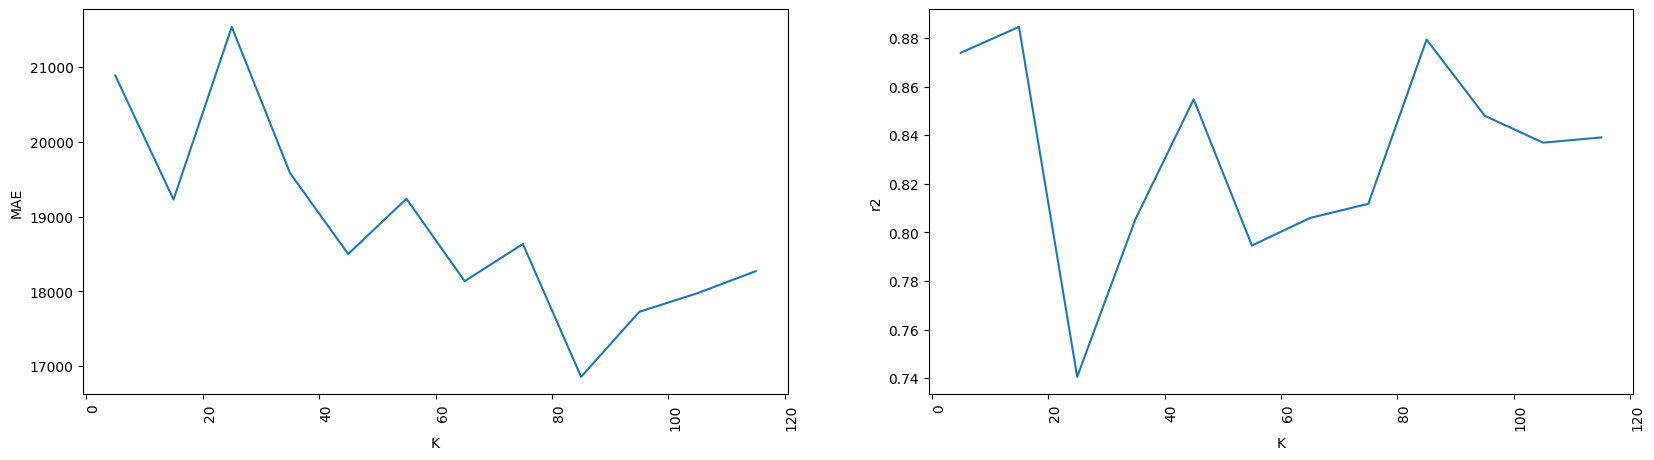

In [412]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

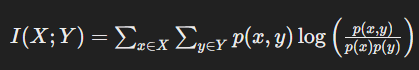

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

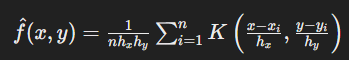

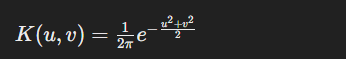

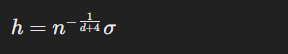

In [413]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [414]:
from sklearn.feature_selection import mutual_info_regression

In [415]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120,10):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,20139.792024,31981.400071,0.866654
1,15,19694.411589,31406.696740,0.871403
2,25,18469.819471,28198.185651,0.896336
3,35,18377.964652,30189.179437,0.881180
4,45,18854.907795,33928.541873,0.849922
5,55,16813.535884,25724.623026,0.913725
6,65,17626.208054,29805.673771,0.884180
7,75,18388.817270,33275.152966,0.855647
8,85,17844.452393,31656.397316,0.869350
9,95,17995.166813,38913.978703,0.802577


In [416]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [417]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
5,55,16813.535884,25724.623026,0.913725
11,115,17339.260170,31305.641161,0.872229
6,65,17626.208054,29805.673771,0.884180
8,85,17844.452393,31656.397316,0.869350
9,95,17995.166813,38913.978703,0.802577
10,105,18150.714634,36319.651561,0.828023
3,35,18377.964652,30189.179437,0.881180
7,75,18388.817270,33275.152966,0.855647
2,25,18469.819471,28198.185651,0.896336
4,45,18854.907795,33928.541873,0.849922


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_6456\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


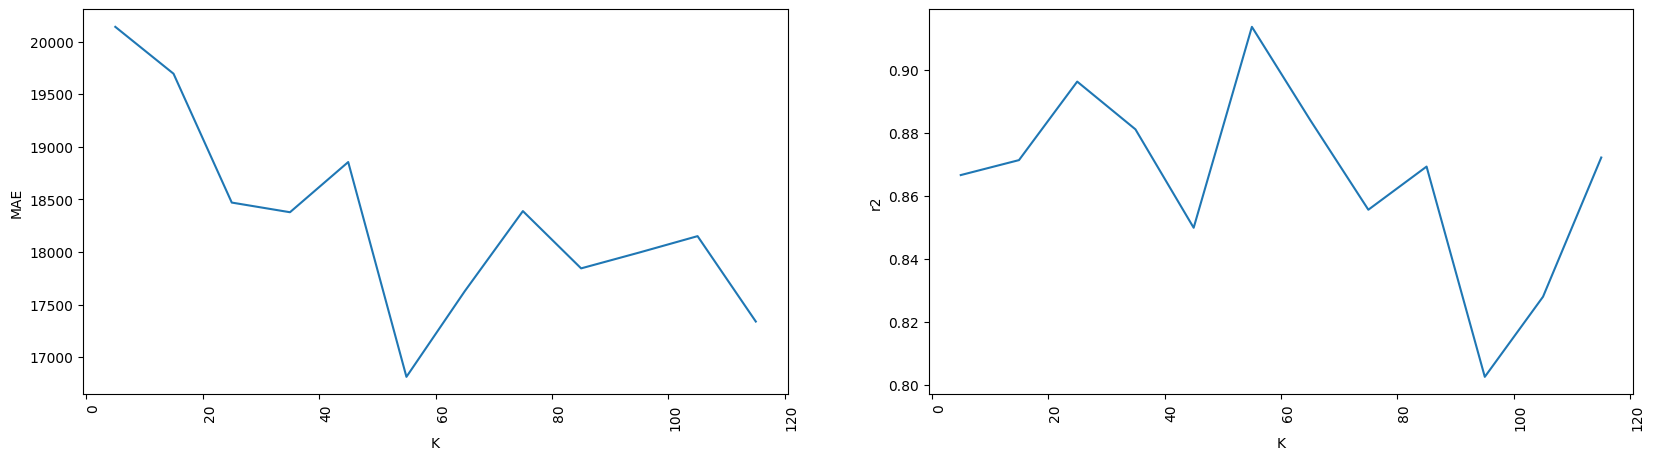

In [418]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [419]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,20725.433024,30432.528706,0.879257
1,15,20245.088758,31288.059848,0.872373
2,25,18418.157592,27589.377155,0.900764
3,35,18173.356427,32300.704802,0.863978
4,45,17999.787065,33458.812992,0.854049
5,55,18369.878453,33457.190339,0.854063
6,65,17735.286296,29829.713916,0.883993
7,75,18840.387468,37759.579894,0.814117
8,85,18453.243630,41040.674397,0.780409
9,95,17952.170270,38631.810791,0.805430


In [420]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,20886.644123,31100.390862,0.873899
1,15,19229.670770,29755.590917,0.884569
2,25,21538.571873,44609.017211,0.740563
3,35,19584.235806,38631.764742,0.805430
4,45,18501.214411,33379.246249,0.854742
5,55,19239.909667,39692.122146,0.794603
6,65,18137.742652,38580.834825,0.805943
7,75,18634.608620,37998.649010,0.811755
8,85,16858.349451,30422.767481,0.879334
9,95,17728.409761,34147.754438,0.847977


In [421]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,20139.792024,31981.400071,0.866654
1,15,19694.411589,31406.696740,0.871403
2,25,18469.819471,28198.185651,0.896336
3,35,18377.964652,30189.179437,0.881180
4,45,18854.907795,33928.541873,0.849922
5,55,16813.535884,25724.623026,0.913725
6,65,17626.208054,29805.673771,0.884180
7,75,18388.817270,33275.152966,0.855647
8,85,17844.452393,31656.397316,0.869350
9,95,17995.166813,38913.978703,0.802577


In [422]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,20725.433024,30432.528706,0.879257,20886.644123,31100.390862,0.873899
1,15,20245.088758,31288.059848,0.872373,19229.670770,29755.590917,0.884569
2,25,18418.157592,27589.377155,0.900764,21538.571873,44609.017211,0.740563
3,35,18173.356427,32300.704802,0.863978,19584.235806,38631.764742,0.805430
4,45,17999.787065,33458.812992,0.854049,18501.214411,33379.246249,0.854742
5,55,18369.878453,33457.190339,0.854063,19239.909667,39692.122146,0.794603
6,65,17735.286296,29829.713916,0.883993,18137.742652,38580.834825,0.805943
7,75,18840.387468,37759.579894,0.814117,18634.608620,37998.649010,0.811755
8,85,18453.243630,41040.674397,0.780409,16858.349451,30422.767481,0.879334
9,95,17952.170270,38631.810791,0.805430,17728.409761,34147.754438,0.847977


In [423]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,20725.433024,30432.528706,0.879257,20886.644123,31100.390862,0.873899,20139.792024,31981.400071,0.866654
1,15,20245.088758,31288.059848,0.872373,19229.670770,29755.590917,0.884569,19694.411589,31406.696740,0.871403
2,25,18418.157592,27589.377155,0.900764,21538.571873,44609.017211,0.740563,18469.819471,28198.185651,0.896336
3,35,18173.356427,32300.704802,0.863978,19584.235806,38631.764742,0.805430,18377.964652,30189.179437,0.881180
4,45,17999.787065,33458.812992,0.854049,18501.214411,33379.246249,0.854742,18854.907795,33928.541873,0.849922
5,55,18369.878453,33457.190339,0.854063,19239.909667,39692.122146,0.794603,16813.535884,25724.623026,0.913725
6,65,17735.286296,29829.713916,0.883993,18137.742652,38580.834825,0.805943,17626.208054,29805.673771,0.884180
7,75,18840.387468,37759.579894,0.814117,18634.608620,37998.649010,0.811755,18388.817270,33275.152966,0.855647
8,85,18453.243630,41040.674397,0.780409,16858.349451,30422.767481,0.879334,17844.452393,31656.397316,0.869350
9,95,17952.170270,38631.810791,0.805430,17728.409761,34147.754438,0.847977,17995.166813,38913.978703,0.802577


In [424]:
columns=["Model", "feature_selection", "NOF", "Scaler", "Encoder" ,"Imputer", "R2", "MAE"]


In [425]:
df_result=pd.DataFrame(columns=columns)
df_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE


In [426]:
df_result["NOF"]=joint["K"]
df_result["R2"]=joint["r2"]
df_result["MAE"]=joint["MAE"]
df_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,NaN,NaN,5,NaN,NaN,NaN,0.866654,20139.792024
1,NaN,NaN,15,NaN,NaN,NaN,0.871403,19694.411589
2,NaN,NaN,25,NaN,NaN,NaN,0.896336,18469.819471
3,NaN,NaN,35,NaN,NaN,NaN,0.881180,18377.964652
4,NaN,NaN,45,NaN,NaN,NaN,0.849922,18854.907795
5,NaN,NaN,55,NaN,NaN,NaN,0.913725,16813.535884
6,NaN,NaN,65,NaN,NaN,NaN,0.884180,17626.208054
7,NaN,NaN,75,NaN,NaN,NaN,0.855647,18388.817270
8,NaN,NaN,85,NaN,NaN,NaN,0.869350,17844.452393
9,NaN,NaN,95,NaN,NaN,NaN,0.802577,17995.166813


In [427]:
df_result["Model"]="StackingRG"
df_result["feature_selection"]="UFS"


In [428]:
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,20725.433024,30432.528706,0.879257,20886.644123,31100.390862,0.873899,20139.792024,31981.400071,0.866654
1,15,20245.088758,31288.059848,0.872373,19229.670770,29755.590917,0.884569,19694.411589,31406.696740,0.871403
2,25,18418.157592,27589.377155,0.900764,21538.571873,44609.017211,0.740563,18469.819471,28198.185651,0.896336
3,35,18173.356427,32300.704802,0.863978,19584.235806,38631.764742,0.805430,18377.964652,30189.179437,0.881180
4,45,17999.787065,33458.812992,0.854049,18501.214411,33379.246249,0.854742,18854.907795,33928.541873,0.849922
5,55,18369.878453,33457.190339,0.854063,19239.909667,39692.122146,0.794603,16813.535884,25724.623026,0.913725
6,65,17735.286296,29829.713916,0.883993,18137.742652,38580.834825,0.805943,17626.208054,29805.673771,0.884180
7,75,18840.387468,37759.579894,0.814117,18634.608620,37998.649010,0.811755,18388.817270,33275.152966,0.855647
8,85,18453.243630,41040.674397,0.780409,16858.349451,30422.767481,0.879334,17844.452393,31656.397316,0.869350
9,95,17952.170270,38631.810791,0.805430,17728.409761,34147.754438,0.847977,17995.166813,38913.978703,0.802577


In [429]:
df_var=pd.DataFrame(columns=columns)
df_var

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE


In [430]:
df_var["NOF"]=statistic_var["K"]
df_var["R2"]=statistic_var["r2"]
df_var["MAE"]=statistic_var["MAE"]
df_var["Model"]="StackingRG"
df_var["feature_selection"]="VarianceThreshold"
df_var

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,StackingRG,VarianceThreshold,100,NaN,NaN,NaN,0.820509,17588.440556
1,StackingRG,VarianceThreshold,110,NaN,NaN,NaN,0.820583,17655.618757
2,StackingRG,VarianceThreshold,120,NaN,NaN,NaN,0.826780,17588.903943
3,StackingRG,VarianceThreshold,130,NaN,NaN,NaN,0.817884,17650.104124
4,StackingRG,VarianceThreshold,140,NaN,NaN,NaN,0.757930,18681.465520
5,StackingRG,VarianceThreshold,150,NaN,NaN,NaN,0.757687,18680.204755
6,StackingRG,VarianceThreshold,160,NaN,NaN,NaN,0.758759,18659.221764
7,StackingRG,VarianceThreshold,170,NaN,NaN,NaN,0.758219,18672.122339
8,StackingRG,VarianceThreshold,180,NaN,NaN,NaN,0.756998,18690.057575
9,StackingRG,VarianceThreshold,190,NaN,NaN,NaN,0.757555,18717.146351


In [431]:
df_last_result=pd.concat([df_var,df_result],axis=0,ignore_index=True)
df_last_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,StackingRG,VarianceThreshold,100,NaN,NaN,NaN,0.820509,17588.440556
1,StackingRG,VarianceThreshold,110,NaN,NaN,NaN,0.820583,17655.618757
2,StackingRG,VarianceThreshold,120,NaN,NaN,NaN,0.826780,17588.903943
3,StackingRG,VarianceThreshold,130,NaN,NaN,NaN,0.817884,17650.104124
4,StackingRG,VarianceThreshold,140,NaN,NaN,NaN,0.757930,18681.465520
5,StackingRG,VarianceThreshold,150,NaN,NaN,NaN,0.757687,18680.204755
6,StackingRG,VarianceThreshold,160,NaN,NaN,NaN,0.758759,18659.221764
7,StackingRG,VarianceThreshold,170,NaN,NaN,NaN,0.758219,18672.122339
8,StackingRG,VarianceThreshold,180,NaN,NaN,NaN,0.756998,18690.057575
9,StackingRG,VarianceThreshold,190,NaN,NaN,NaN,0.757555,18717.146351


In [432]:
df_statistic=pd.read_csv(r"C:\Users\NTCUONG\notebook\cnt-first-project\eda+model_LR\statistic_training_dataset.csv")
df_statistic

,DATASET,ENCODER,IMPUTER,NORMALIZER
0,training1.csv,LabelEncoder,simpleimputer,none
1,training2.csv,LabelEncoder,simpleimputer,normalizer
2,training3.csv,LabelEncoder,simpleimputer,minmaxscaler
3,training4.csv,LabelEncoder,knnimputer,none
4,training5.csv,LabelEncoder,knnimputer,normalizer
5,training6.csv,LabelEncoder,knnimputer,minmaxscaler
6,training7.csv,OnehotEncoder,simpleimputer,none
7,training8.csv,OnehotEncoder,simpleimputer,normalizer
8,training9.csv,OnehotEncoder,simpleimputer,minmaxscaler
9,training10.csv,OnehotEncoder,knnimputer,none


# Note

In [433]:
df_last_result["Scaler"]="None"
df_last_result["Encoder"]="OnehotEncoder"
df_last_result["Imputer"]="SimpleImputer"
df_last_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,StackingRG,VarianceThreshold,100,None,OnehotEncoder,SimpleImputer,0.820509,17588.440556
1,StackingRG,VarianceThreshold,110,None,OnehotEncoder,SimpleImputer,0.820583,17655.618757
2,StackingRG,VarianceThreshold,120,None,OnehotEncoder,SimpleImputer,0.826780,17588.903943
3,StackingRG,VarianceThreshold,130,None,OnehotEncoder,SimpleImputer,0.817884,17650.104124
4,StackingRG,VarianceThreshold,140,None,OnehotEncoder,SimpleImputer,0.757930,18681.465520
5,StackingRG,VarianceThreshold,150,None,OnehotEncoder,SimpleImputer,0.757687,18680.204755
6,StackingRG,VarianceThreshold,160,None,OnehotEncoder,SimpleImputer,0.758759,18659.221764
7,StackingRG,VarianceThreshold,170,None,OnehotEncoder,SimpleImputer,0.758219,18672.122339
8,StackingRG,VarianceThreshold,180,None,OnehotEncoder,SimpleImputer,0.756998,18690.057575
9,StackingRG,VarianceThreshold,190,None,OnehotEncoder,SimpleImputer,0.757555,18717.146351


In [434]:
# df_last_result.to_csv("StatisticModel.csv",index=False)

In [435]:
old_df = pd.read_csv("StatisticModel.csv")
old_df

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,StackingRG,VarianceThreshold,100,NaN,LabelEncoder,SimpleImputer,0.818297,19205.697521
1,StackingRG,VarianceThreshold,110,NaN,LabelEncoder,SimpleImputer,0.818556,19160.060861
2,StackingRG,VarianceThreshold,120,NaN,LabelEncoder,SimpleImputer,0.817641,19212.891271
3,StackingRG,VarianceThreshold,130,NaN,LabelEncoder,SimpleImputer,0.820348,19128.098136
4,StackingRG,VarianceThreshold,140,NaN,LabelEncoder,SimpleImputer,0.819074,19144.268012
...,...,...,...,...,...,...,...,...
307,StackingRG,UFS,75,Minmaxscaler,LabelEncoder,KnnImputer,0.738567,19008.049775
308,StackingRG,UFS,85,Minmaxscaler,LabelEncoder,KnnImputer,0.734697,19035.923264
309,StackingRG,UFS,95,Minmaxscaler,LabelEncoder,KnnImputer,0.735359,19009.846657
310,StackingRG,UFS,105,Minmaxscaler,LabelEncoder,KnnImputer,0.738667,19023.777456


In [436]:
df_last_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,StackingRG,VarianceThreshold,100,None,OnehotEncoder,SimpleImputer,0.820509,17588.440556
1,StackingRG,VarianceThreshold,110,None,OnehotEncoder,SimpleImputer,0.820583,17655.618757
2,StackingRG,VarianceThreshold,120,None,OnehotEncoder,SimpleImputer,0.826780,17588.903943
3,StackingRG,VarianceThreshold,130,None,OnehotEncoder,SimpleImputer,0.817884,17650.104124
4,StackingRG,VarianceThreshold,140,None,OnehotEncoder,SimpleImputer,0.757930,18681.465520
5,StackingRG,VarianceThreshold,150,None,OnehotEncoder,SimpleImputer,0.757687,18680.204755
6,StackingRG,VarianceThreshold,160,None,OnehotEncoder,SimpleImputer,0.758759,18659.221764
7,StackingRG,VarianceThreshold,170,None,OnehotEncoder,SimpleImputer,0.758219,18672.122339
8,StackingRG,VarianceThreshold,180,None,OnehotEncoder,SimpleImputer,0.756998,18690.057575
9,StackingRG,VarianceThreshold,190,None,OnehotEncoder,SimpleImputer,0.757555,18717.146351


In [437]:
df_result=pd.concat([old_df,df_last_result],axis=0,ignore_index=True)
df_result

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,StackingRG,VarianceThreshold,100,NaN,LabelEncoder,SimpleImputer,0.818297,19205.697521
1,StackingRG,VarianceThreshold,110,NaN,LabelEncoder,SimpleImputer,0.818556,19160.060861
2,StackingRG,VarianceThreshold,120,NaN,LabelEncoder,SimpleImputer,0.817641,19212.891271
3,StackingRG,VarianceThreshold,130,NaN,LabelEncoder,SimpleImputer,0.820348,19128.098136
4,StackingRG,VarianceThreshold,140,NaN,LabelEncoder,SimpleImputer,0.819074,19144.268012
...,...,...,...,...,...,...,...,...
359,StackingRG,UFS,75,None,OnehotEncoder,SimpleImputer,0.855647,18388.817270
360,StackingRG,UFS,85,None,OnehotEncoder,SimpleImputer,0.869350,17844.452393
361,StackingRG,UFS,95,None,OnehotEncoder,SimpleImputer,0.802577,17995.166813
362,StackingRG,UFS,105,None,OnehotEncoder,SimpleImputer,0.828023,18150.714634


In [438]:
df_result.to_csv("StatisticModel.csv",index=False)

In [439]:
df=pd.read_csv("StatisticModel.csv")
df

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,StackingRG,VarianceThreshold,100,NaN,LabelEncoder,SimpleImputer,0.818297,19205.697521
1,StackingRG,VarianceThreshold,110,NaN,LabelEncoder,SimpleImputer,0.818556,19160.060861
2,StackingRG,VarianceThreshold,120,NaN,LabelEncoder,SimpleImputer,0.817641,19212.891271
3,StackingRG,VarianceThreshold,130,NaN,LabelEncoder,SimpleImputer,0.820348,19128.098136
4,StackingRG,VarianceThreshold,140,NaN,LabelEncoder,SimpleImputer,0.819074,19144.268012
...,...,...,...,...,...,...,...,...
359,StackingRG,UFS,75,NaN,OnehotEncoder,SimpleImputer,0.855647,18388.817270
360,StackingRG,UFS,85,NaN,OnehotEncoder,SimpleImputer,0.869350,17844.452393
361,StackingRG,UFS,95,NaN,OnehotEncoder,SimpleImputer,0.802577,17995.166813
362,StackingRG,UFS,105,NaN,OnehotEncoder,SimpleImputer,0.828023,18150.714634


In [440]:
df["Imputer"].unique()

array(['SimpleImputer', 'KnnImputer'], dtype=object)

In [441]:
# df["Imputer"]=df["Imputer"].apply(lambda x:"SimpleImputer" if x=="Simpleimputer" else x)

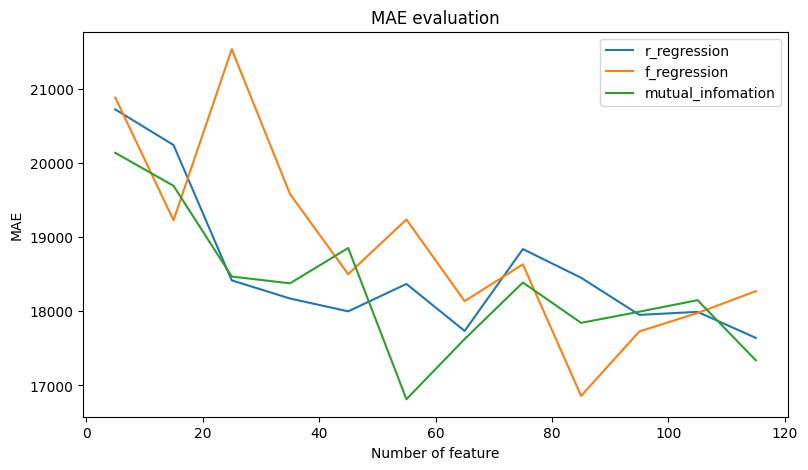

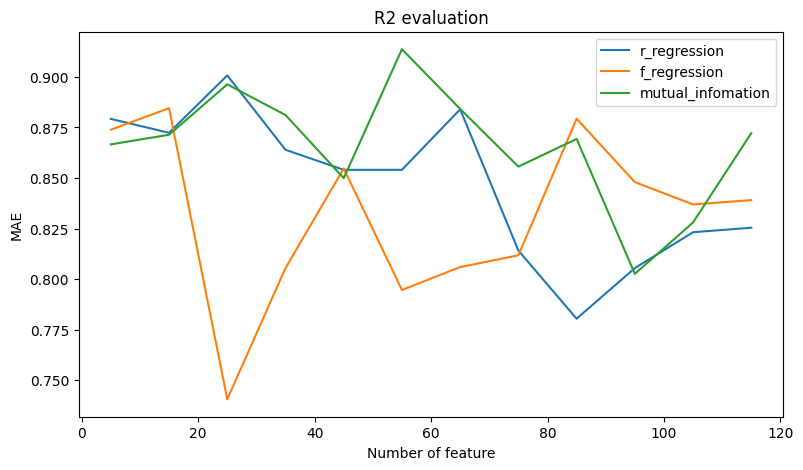

In [442]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()